In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns

df = pd.read_excel('/content/drive/MyDrive/시계열/sw_merge.xlsx')
df.head()

,Date,Foreign Holdings,Foreign Ownership Percentage,SOX_Close,SOX_Open,SOX_High,SOX_Low,SOX_Change Volume,US Economic Growth Rate,KR Economic Growth Rate,US GDP Annual,KR GDP Annual,CN GDP Annual
0,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.3,1.2,2.2,4.5,9.5
1,2001-01-02,81904155.0,54.16,570.3,576.6,595.6,558.7,-0.0109,NaN,NaN,NaN,NaN,NaN
2,2001-01-03,82201203.0,54.35,670.2,570.3,670.5,556.5,0.1752,NaN,NaN,NaN,NaN,NaN
3,2001-01-04,82417765.0,54.49,653.8,670.2,684.8,643.4,-0.0245,NaN,NaN,NaN,NaN,NaN
4,2001-01-05,83687658.0,55.33,617.5,653.8,660.3,612.0,-0.0555,NaN,NaN,NaN,NaN,NaN


# 외국인

<Figure size 1000x600 with 0 Axes>

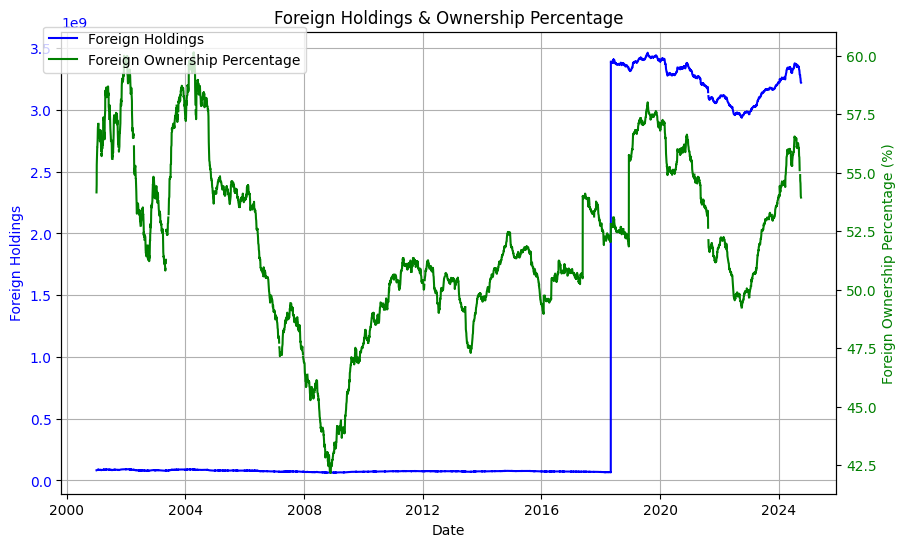

In [ ]:
plt.figure(figsize=(10, 6))

# 첫 번째 y축: Foreign Holdings
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Date'], df['Foreign Holdings'], label='Foreign Holdings', color='blue')
ax1.set_ylabel('Foreign Holdings', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: Foreign Ownership Percentage
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Foreign Ownership Percentage'], label='Foreign Ownership Percentage', color='green')
ax2.set_ylabel('Foreign Ownership Percentage (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 공통 타이틀 및 설정
plt.title('Foreign Holdings & Ownership Percentage')
ax1.set_xlabel('Date')
ax1.grid()

# 범례 표시
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()


<Figure size 1000x600 with 0 Axes>

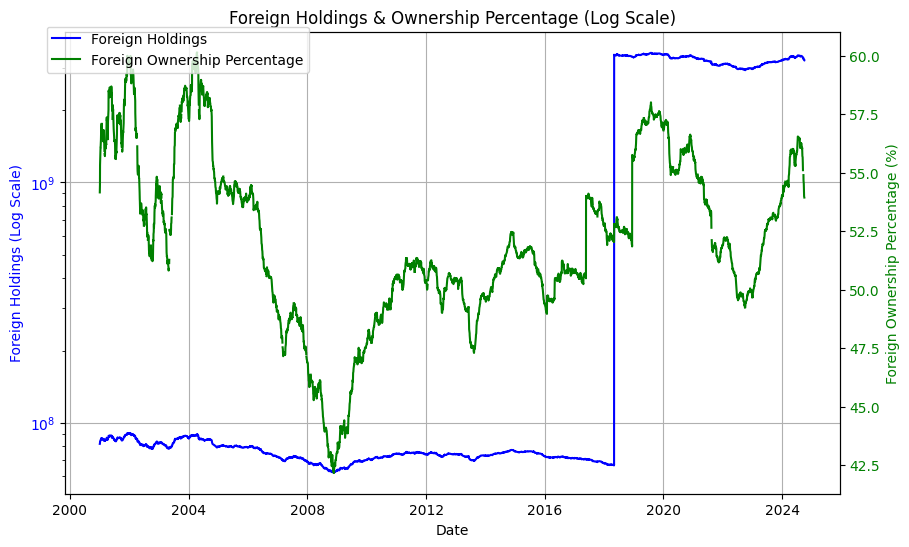

In [ ]:
plt.figure(figsize=(10, 6))

# 첫 번째 y축: Foreign Holdings (로그 스케일 적용)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df['Date'], df['Foreign Holdings'], label='Foreign Holdings', color='blue')
ax1.set_yscale('log')  # 로그 스케일
ax1.set_ylabel('Foreign Holdings (Log Scale)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: Foreign Ownership Percentage
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Foreign Ownership Percentage'], label='Foreign Ownership Percentage', color='green')
ax2.set_ylabel('Foreign Ownership Percentage (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 공통 타이틀 및 설정
plt.title('Foreign Holdings & Ownership Percentage (Log Scale)')
ax1.set_xlabel('Date')
ax1.grid()

# 범례 표시
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.show()


# 필라델피아 반도체 지수

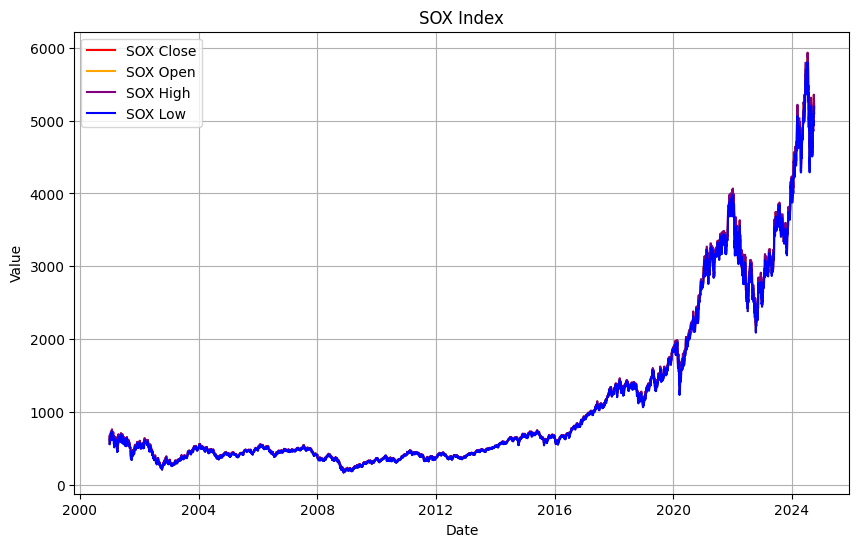

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SOX_Close'], label='SOX Close', color='red')
plt.plot(df['Date'], df['SOX_Open'], label='SOX Open', color='orange')
plt.plot(df['Date'], df['SOX_High'], label='SOX High', color='purple')
plt.plot(df['Date'], df['SOX_Low'], label='SOX Low', color='blue')
plt.title('SOX Index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

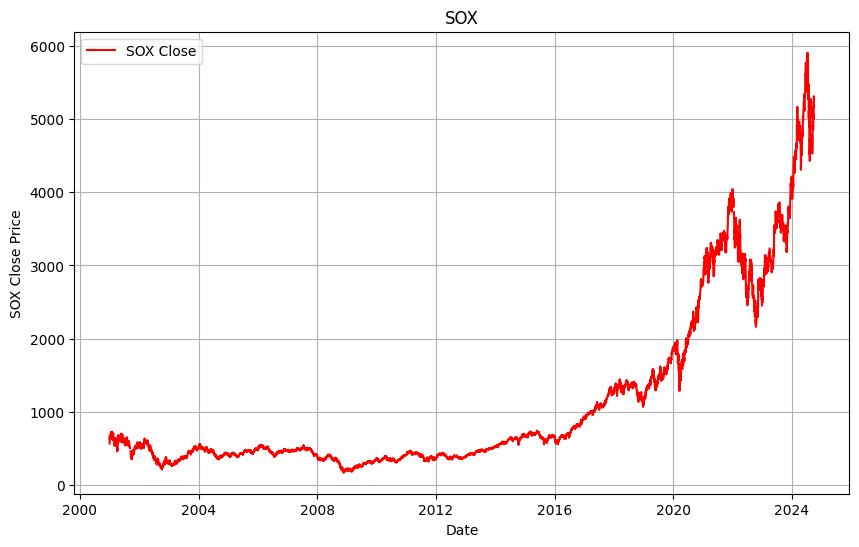

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SOX_Close'], label='SOX Close', color='red')
plt.title('SOX')
plt.xlabel('Date')
plt.ylabel('SOX Close Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


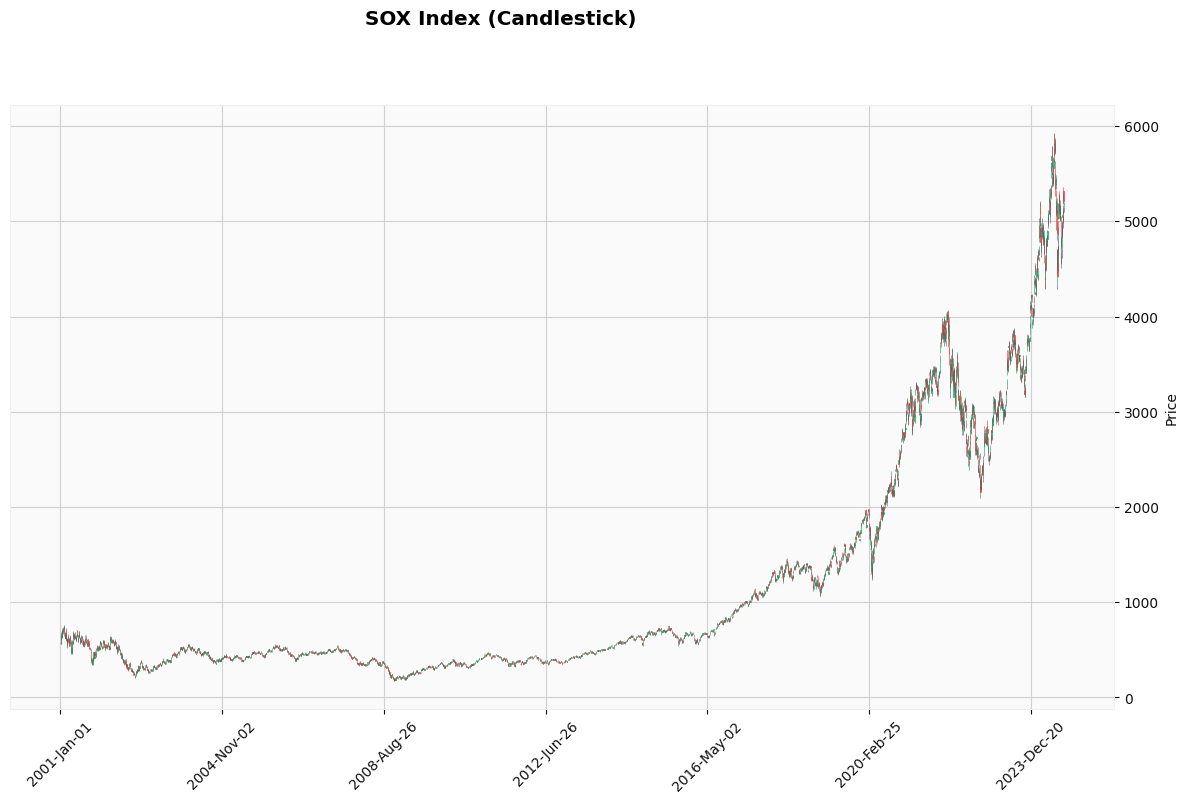

In [ ]:
import mplfinance as mpf

ohlc = df[['SOX_Open', 'SOX_High', 'SOX_Low', 'SOX_Close']].copy()
ohlc.columns = ['Open', 'High', 'Low', 'Close']  # mplfinance가 요구하는 이름으로 변경

mpf.plot(
    ohlc,
    type='candle',
    style='yahoo',
    title='SOX Index (Candlestick)',
    ylabel='Price',
    figratio=(16, 9),  # 가로:세로 비율
    figscale=1.5       # 그래프 크기 확대
)


# 경제성장률 (분기)

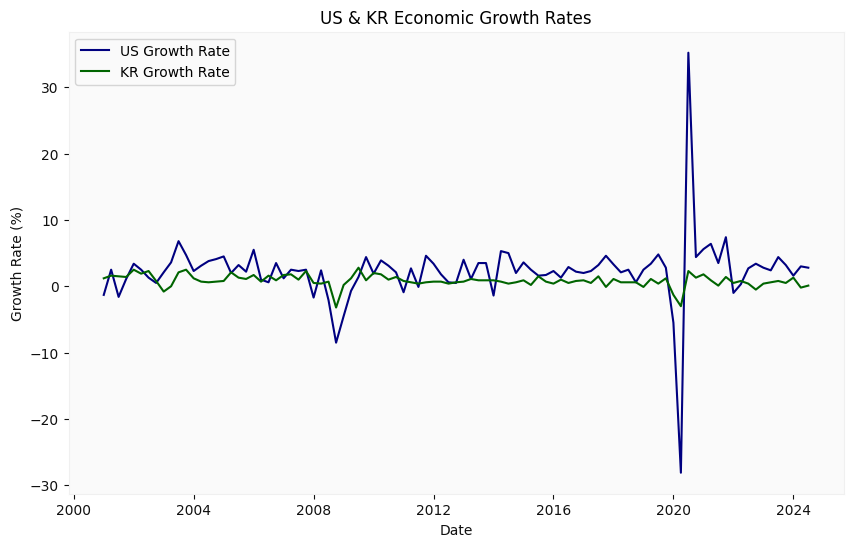

In [ ]:
import matplotlib.pyplot as plt

# NaN 값을 제거한 데이터프레임 생성
df_clean = df.dropna(subset=['US Economic Growth Rate', 'KR Economic Growth Rate'])

plt.figure(figsize=(10, 6))

# NaN 값을 제거한 데이터로 그래프 그리기
plt.plot(df_clean['Date'], df_clean['US Economic Growth Rate'], label='US Growth Rate', color='navy')
plt.plot(df_clean['Date'], df_clean['KR Economic Growth Rate'], label='KR Growth Rate', color='darkgreen')

plt.title('US & KR Economic Growth Rates')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid()
plt.show()


# 경제성장률 (연도)

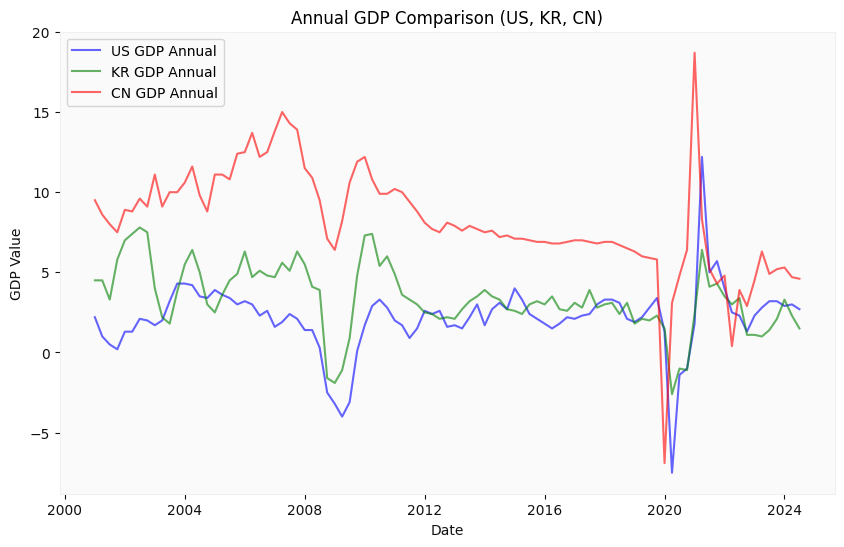

In [ ]:
import matplotlib.pyplot as plt

# NaN 값을 제거한 데이터프레임 생성
df_clean = df.dropna(subset=['US GDP Annual', 'KR GDP Annual', 'CN GDP Annual'])

plt.figure(figsize=(10, 6))

# NaN 값을 제거한 데이터로 그래프 그리기
plt.plot(df_clean['Date'], df_clean['US GDP Annual'], label='US GDP Annual', alpha=0.6, color='blue')
plt.plot(df_clean['Date'], df_clean['KR GDP Annual'], label='KR GDP Annual', alpha=0.6, color='green')
plt.plot(df_clean['Date'], df_clean['CN GDP Annual'], label='CN GDP Annual', alpha=0.6, color='red')

plt.title('Annual GDP Comparison (US, KR, CN)')
plt.xlabel('Date')
plt.ylabel('GDP Value')
plt.legend()
plt.grid()
plt.show()
